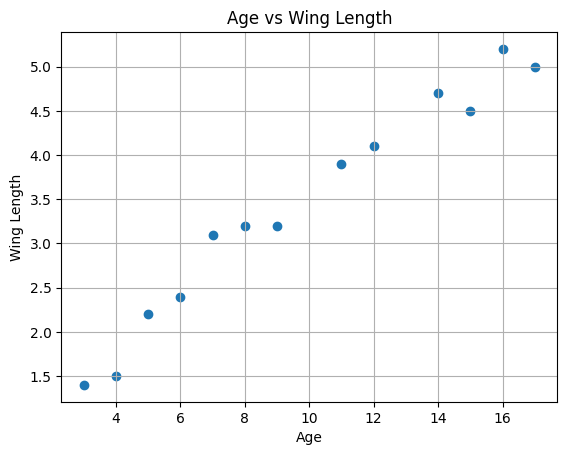

In [1]:
import matplotlib.pyplot as plt

# Given data
age = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
wing_length = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

# Plot Age vs Wing Length
plt.scatter(age, wing_length, label='Data points')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Age vs Wing Length')
plt.grid(True)
plt.show()


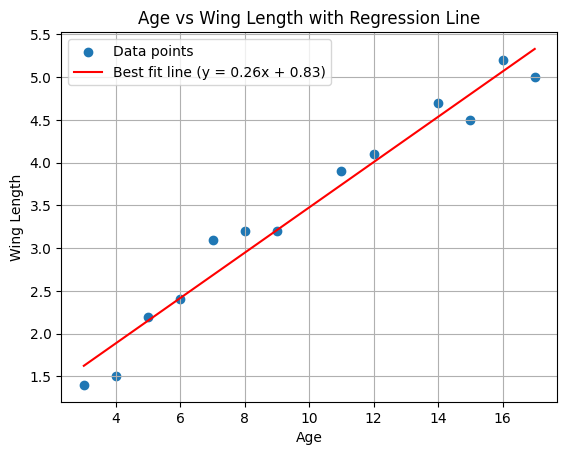

In [2]:
import numpy as np

# Perform linear regression
slope, intercept = np.polyfit(age, wing_length, 1)  # Linear fit

# Generate values for the best fit line
age_fit = np.linspace(min(age), max(age), 100)
wing_fit = slope * age_fit + intercept

# Plot data points and regression line
plt.scatter(age, wing_length, label='Data points')
plt.plot(age_fit, wing_fit, label=f'Best fit line (y = {slope:.2f}x + {intercept:.2f})', color='red')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Age vs Wing Length with Regression Line')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
from scipy import stats

# Perform linear regression with p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(age, wing_length)

# Print the p-value
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("We reject the null hypothesis (b ≠ 0)")
else:
    print("We fail to reject the null hypothesis (b = 0)")


P-value: 3.0097431724571258e-09
We reject the null hypothesis (b ≠ 0)


95% confidence interval for slope: (0.23, 0.30)


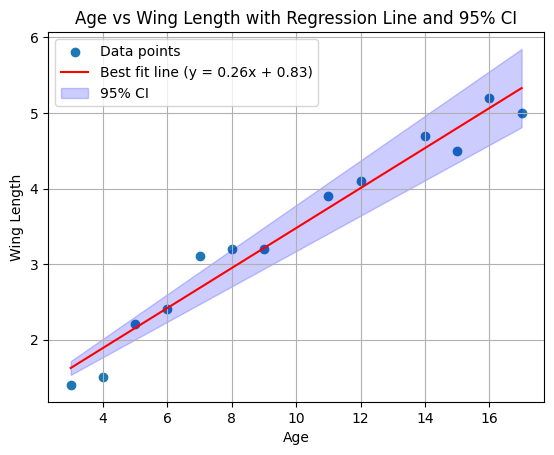

In [4]:
# Confidence interval calculations (95%)
t_value = 1.96  # For 95% confidence
slope_ci_lower = slope - t_value * std_err
slope_ci_upper = slope + t_value * std_err

print(f"95% confidence interval for slope: ({slope_ci_lower:.2f}, {slope_ci_upper:.2f})")

# Plot data points, regression line, and confidence intervals
plt.scatter(age, wing_length, label='Data points')
plt.plot(age_fit, wing_fit, label=f'Best fit line (y = {slope:.2f}x + {intercept:.2f})', color='red')
plt.fill_between(age_fit, slope_ci_lower * age_fit + intercept, slope_ci_upper * age_fit + intercept, color='blue', alpha=0.2, label="95% CI")
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Age vs Wing Length with Regression Line and 95% CI')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
# Coefficient of determination
r_squared = r_value**2
print(f"Coefficient of determination (r^2): {r_squared}")


Coefficient of determination (r^2): 0.9633822518042855


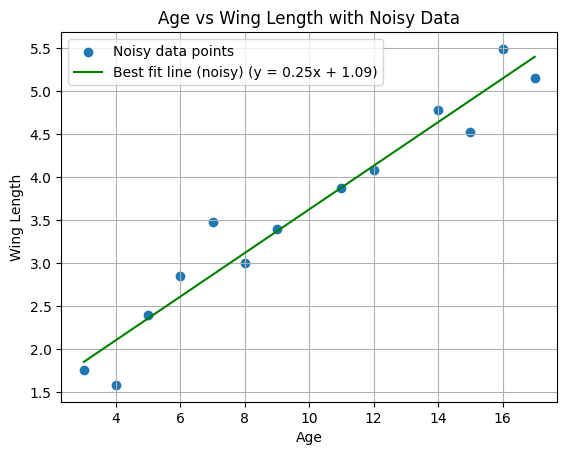

Slope (noisy): 0.2536600466253257
Intercept (noisy): 1.087160875438113


In [6]:
# Add noise to the data
np.random.seed(0)
noise = np.random.normal(0, 0.2, len(age))
wing_length_noisy = np.array(wing_length) + noise

# Perform linear regression on noisy data
slope_noisy, intercept_noisy = np.polyfit(age, wing_length_noisy, 1)

# Generate values for the best fit line (noisy data)
wing_fit_noisy = slope_noisy * age_fit + intercept_noisy

# Plot noisy data points and regression line
plt.scatter(age, wing_length_noisy, label='Noisy data points')
plt.plot(age_fit, wing_fit_noisy, label=f'Best fit line (noisy) (y = {slope_noisy:.2f}x + {intercept_noisy:.2f})', color='green')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Age vs Wing Length with Noisy Data')
plt.grid(True)
plt.legend()
plt.show()

# Print slope and intercept for noisy data
print(f"Slope (noisy): {slope_noisy}")
print(f"Intercept (noisy): {intercept_noisy}")
